In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [0]:
import h5py
import numpy as np

In [0]:
h5f = drive.CreateFile({'id':'1wny1UsY97XmoIE4sfyMMDrwLPDedMPoB'}) # replace the id with id of file you want to access
h5f.GetContentFile('SVHN.h5')

In [0]:

h5f =h5py.File('SVHN.h5','r')

In [0]:
X_train = h5f['X_train'][:]
y_train1= h5f['y_train'][:]
X_test= h5f['X_test'][:]
y_test1= h5f['y_test'][:]

In [7]:
h5f.close

<bound method File.close of <HDF5 file "SVHN.h5" (mode r)>>

In [8]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential



Using TensorFlow backend.


In [0]:
from keras.utils import np_utils


In [0]:
from keras.layers import Dense, Dropout, Activation, Flatten


In [0]:
# fix random seed for reproducability 
seed = 7
np.random.seed(seed)

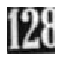

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


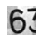

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


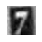

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


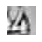

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


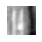

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


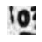

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


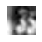

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


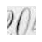

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


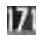

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


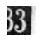

label for each of the above image:[2 6 7 4 4 0 3 0 7 3]


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10,1))
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(X_train[i], cmap="gray")
  plt.axis('off')
  plt.show()
  print('label for each of the above image:%s'%(y_train1[0:10]))


In [0]:
X_train= X_train.reshape(X_train.shape[0],1024)
X_test = X_test.reshape(X_test.shape[0],1024)

In [14]:
# #normalize inputs from 0-255 to 0-1
X_train= X_train/255.0
X_test =X_test/255.0
print('Training set',X_train.shape,y_train1.shape)
print('Testset',X_test.shape,y_test1.shape)


Training set (42000, 1024) (42000,)
Testset (18000, 1024) (18000,)


In [15]:
print(X_test.shape)
print(y_test1.shape)

(18000, 1024)
(18000,)


In [16]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train1)
y_test=np_utils.to_categorical(y_test1)

#no of classes
num_classes= y_test.shape[1]
num_hidden=32
num_classes

10

In [0]:
x_tr = []
for i in range (42000):
  x_tr.append(X_train[i,:].flatten())
x_te=[]
for i in range(18000):
  x_te.append(X_test[i,:].flatten())

In [0]:
x_tr =x_tr[:2000]
x_te= x_te[:2000]

y_tr= y_train1[0:2000]
y_te =y_test1[0:2000]

In [19]:
print(len(x_tr))
print(len(y_tr))
print(len(x_te))
print(len(y_te))

2000
2000
2000
2000


In [0]:
a=[]
j=[]
def knnvalue(k):
  from sklearn.neighbors import KNeighborsClassifier
  NHH = KNeighborsClassifier(n_neighbors=k,weights='uniform')
  NHH.fit(x_tr,y_tr)
  predicted_labels= NHH.predict(x_te)
  from sklearn.metrics import accuracy_score
  ascore= accuracy_score(y_te,predicted_labels)
  MSE= 1-ascore
  a.append(MSE)
  j.append(k)
  print(ascore)
 


In [21]:
for i in range(1,30,2):
  knnvalue(i)
  


0.2975
0.292
0.3015
0.307
0.3055
0.311
0.2975
0.294
0.2975
0.2935
0.2945
0.2955
0.2865
0.2805
0.279


In [0]:
# for the above run the KNN value is the lowest for K=11
from sklearn.neighbors import KNeighborsClassifier
NHH = KNeighborsClassifier(n_neighbors=11,weights='uniform')
NHH.fit(x_tr,y_tr)
pred= NHH.predict(x_te)

In [23]:
len(pred)

2000

In [24]:
pred[0]

6

In [25]:
pred[1]

0

In [26]:
y_te[0]

1

In [27]:
# Finding out the confusion matrix and accuracy 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
print(classification_report(pred,y_te))

              precision    recall  f1-score   support

           0       0.48      0.29      0.36       363
           1       0.55      0.31      0.40       325
           2       0.39      0.26      0.31       277
           3       0.19      0.22      0.21       164
           4       0.46      0.42      0.44       219
           5       0.20      0.33      0.25       132
           6       0.25      0.27      0.26       190
           7       0.32      0.49      0.39       132
           8       0.10      0.32      0.15        60
           9       0.18      0.26      0.21       138

    accuracy                           0.31      2000
   macro avg       0.31      0.32      0.30      2000
weighted avg       0.37      0.31      0.32      2000



In [0]:
# inference from the above classification report the accuracy is about 30% which is very poor so KNN is not suitable model need to explore more

In [0]:
# define model
import keras
from keras import losses
from keras import optimizers
from keras.layers import Dropout,MaxPooling2D
from keras.layers import BatchNormalization

In [30]:
# create model
def nn_model():
  model= Sequential()
  model.add(BatchNormalization(input_shape=((1024,)))) 
  model.add(Dense(256,activation='relu'))
  model.add(Dense(64,activation='relu'))
  model.add(Dense(32,activation='relu'))
  model.add(Dense(num_classes,activation='softmax'))
  # compile the model
  sgd= optimizers.Adam(lr =1e-3)
  model.compile(loss=losses.categorical_crossentropy,optimizer=sgd,metrics=['accuracy'])
  return model
# Build the model
model = nn_model()
# Fit the model
history = model.fit(X_test,y_test, validation_data=(X_test,y_test),epochs=30,batch_size=200,verbose=2)
scores= model.evaluate(X_test,y_test,verbose=0)
print("Error:%.2f%%" %(100-scores[1]*100))
model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 18000 samples, validate on 18000 samples
Epoch 1/30





 - 3s - loss: 1.9386 - acc: 0.3234 - val_loss: 1.4032 - val_acc: 0.5502
Epoch 2/30
 - 2s - loss: 1.2347 - acc: 0.6059 - val_loss: 1.0486 - val_acc: 0.6711
Epoch 3/30
 - 2s - loss: 0.9936 - acc: 0.6889 - val_loss: 0.8793 - val_acc: 0.7276
Epoch 4/30
 - 2s - loss: 0.8779 - acc: 0.7242 - val_loss: 0.7674 - val_acc: 0.7617
Epoch 5/30
 - 2s - loss: 0.7806 - acc: 0.7554 - val_loss: 0.7021 - val_acc: 0.7785
Epoch 6/30
 - 2s - loss: 0.7290 - acc: 0.7709 - val_loss: 0.6311 - val_acc: 0.7995
Epoch 7/30
 - 2s - loss: 0.6677 - acc: 0.7921 - val_loss: 0.6021 - val_acc: 0.8082
Epoch 8/30
 - 2s - loss: 0.6288 - acc: 0.8026 - val_loss: 0.5501 - val_acc: 0.8278
Epoch 9/30
 - 2s - loss: 0.5848 - acc: 0.8138 - val_loss: 0.5015 - val_acc: 0.8448
Epoch 10/30
 - 2s - loss: 0.5550 - acc: 0.8258 - val_loss: 0.4660 - val_acc: 0.8579
Epoch 11/30
 - 2s

In [0]:
# Error = 6.56% and accuracy = 0.9224
# Deep learning is able to work on huge amount of data set especially with multi-dimensional data and was able to perform better than KNN


In [33]:
Y_pred= model.predict(X_test)
print(np.argmax(Y_pred[2]))
print(np.argmax(y_test[2]))
print(history.history.keys())


2
2
dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


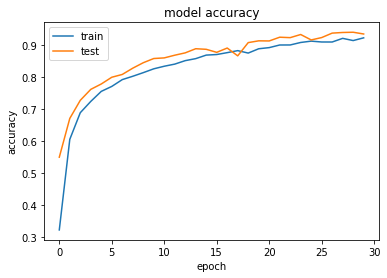

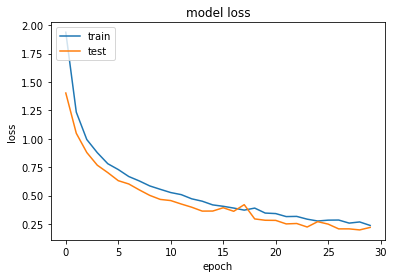

In [34]:
#summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()
